### Yevonnael Andrew
#### Advanced Regression Personal Project

# Introduction

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
    - Which variables are significant in predicting the price of a house, and
    - How well those variables describe the price of a house.
    
Also, determine the optimal value of lambda for ridge and lasso regression.

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

We will calculate how many null values in each columns and will drop columns which have null values > 20%

In [4]:
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False).head(10)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
dtype: float64

In [5]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis='columns')

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

## EDA

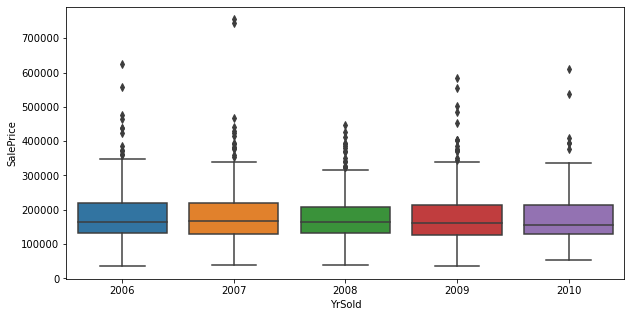

In [7]:
plt.figure(figsize= [10,5])
sns.boxplot(y="SalePrice", x="YrSold", data=df);

The sale price of the house is mostly the same across the year sold.

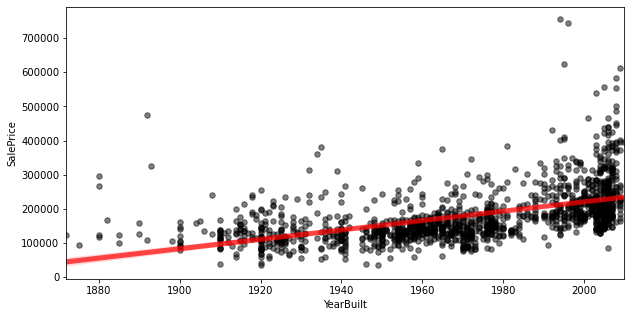

In [8]:
plt.figure(figsize= [10,5])
sns.regplot(x=df.YearBuilt, y=df.SalePrice, line_kws={"color":"r","alpha":0.7,"lw":5},
scatter_kws={"color":"black","alpha":0.5,"s":30});

We can see an increase in sales price in response to the change of the year built of the house.

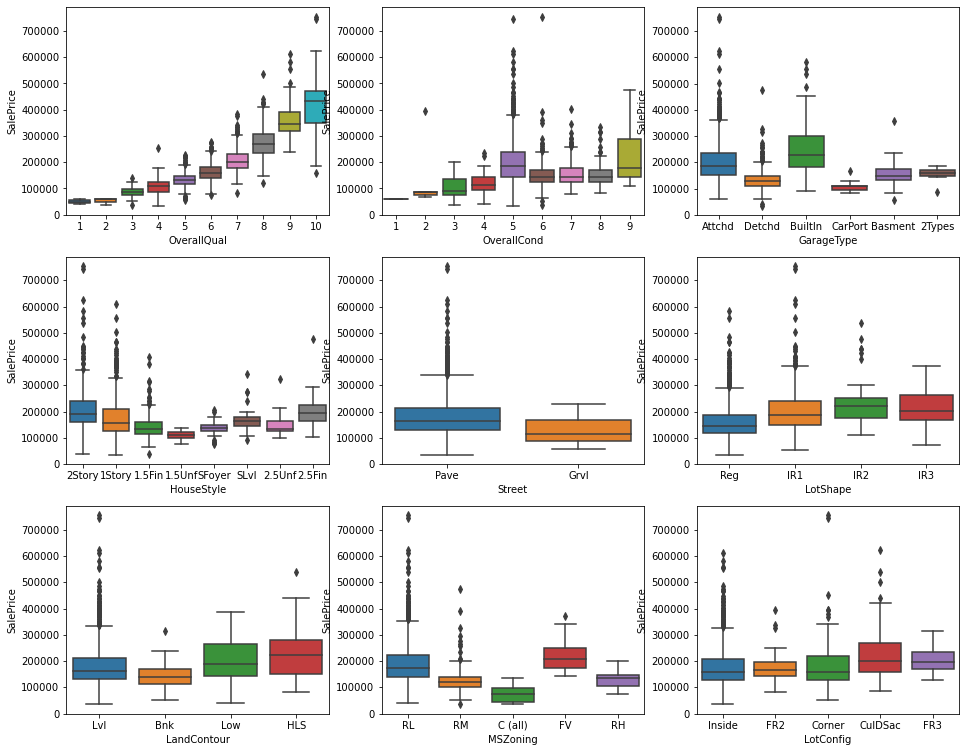

In [9]:
plt.figure(figsize=(16,13))
plt.subplot(3,3,1)
sns.boxplot(y="SalePrice", x="OverallQual", data=df);
plt.subplot(3,3,2)
sns.boxplot(y="SalePrice", x="OverallCond", data=df);
plt.subplot(3,3,3)
sns.boxplot(y="SalePrice", x="GarageType", data=df);
plt.subplot(3,3,4)
sns.boxplot(y="SalePrice", x="HouseStyle", data=df);
plt.subplot(3,3,5)
sns.boxplot(y="SalePrice", x="Street", data=df);
plt.subplot(3,3,6)
sns.boxplot(y="SalePrice", x="LotShape", data=df);
plt.subplot(3,3,7)
sns.boxplot(y="SalePrice", x="LandContour", data=df);
plt.subplot(3,3,8)
sns.boxplot(y="SalePrice", x="MSZoning", data=df);
plt.subplot(3,3,9)
sns.boxplot(y="SalePrice", x="LotConfig", data=df);

From plot above, we can see how the sale price is varying across the independent variables.

We also can see there is a noticable increase of sale price as the overall quality increases.

## Features Engineering

In [10]:
df[['YearBuilt', 'YearRemodAdd',  'GarageYrBlt', 'MoSold', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008


We will create a new variable called **remodeled**. It will contain **Yes** if the YearBuilt and YearRemodAdd is different. It indicates the house is remodeled after the house was built. It will contain **No** if the YearBuilt and YearRemodAdd is the same, it indicates the house is in the original state since it built.

In [11]:
df['remodeled'] = np.where(df['YearBuilt']!= df['YearRemodAdd'], 'Yes', 'No')

We want to know if the garage was built after the house is built? If the house still doesn't have a garage, then we don't consider it as it was build afterwards.

In [12]:
df['garage_post'] = np.where((df['GarageYrBlt'] == df['YearBuilt']) | (df['GarageCond'].isnull()), 'No', 'Yes')

From the EDA, we know the YearBuilt is affected by the SalePrice. We will create a new variable **house_age**, which substracting the maximum year with the year that house was built.

In [13]:
df['house_age'] = df.YearBuilt.max() - df.YearBuilt

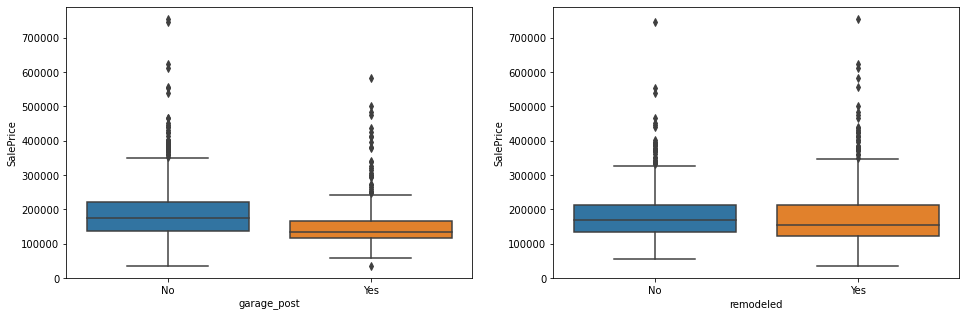

In [14]:
plt.figure(figsize= [16,5])
plt.subplot(1,2,1)
sns.boxplot(y="SalePrice", x="garage_post", data=df);
plt.subplot(1,2,2)
sns.boxplot(y="SalePrice", x="remodeled", data=df);

**Drop the unnecessary columns**

In [15]:
df = df.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YearBuilt','MoSold'],axis='columns')

Create a new variable **TotalSqFt_constructed** which is the sum of **GrLivArea** + **TotalBsmtSF** + **GarageArea**

In [16]:
df['TotalSqFt_constructed'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea']
df = df.drop(['GrLivArea', 'TotalBsmtSF', 'GarageArea'], axis='columns')

**Fill NA with 0 if numeric and None for the rest**

In [17]:
c = df.select_dtypes(np.number).columns
df[c] = df[c].fillna(0)
df = df.fillna("None")

**Make sure no null data**

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**It is better if we have a target variable that is normally distributed.**

**From the above description and the plot below, we could see the target variable skewed.**

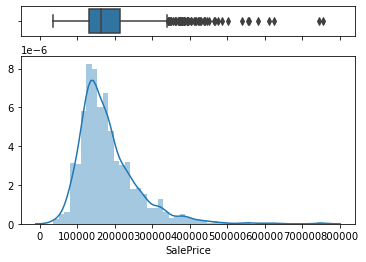

In [20]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df.SalePrice, ax=ax_box);
sns.distplot(df.SalePrice, ax=ax_hist);
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

**Transform the target variable with log operation and plot again to confirm it more normally distributed**

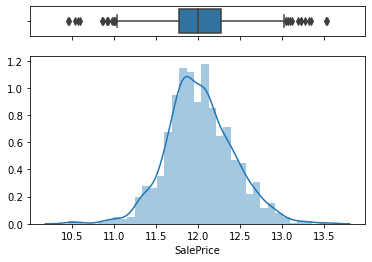

In [21]:
df.SalePrice = np.log(df.SalePrice)

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df.SalePrice, ax=ax_box);
sns.distplot(df.SalePrice, ax=ax_hist);
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

**Split the target variable and predictors**

In [22]:
y = df.pop('SalePrice') # target
X = df # predictors

**Creating dummy variables for categorical variables**

In [23]:
# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,remodeled,garage_post
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,No,No
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,No,No
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Yes,No
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,Yes,Yes
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,No,No


In [24]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,remodeled_Yes,garage_post_Yes
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [25]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)
# concat dummy variables with X
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X = pd.concat([X, df_dummies], axis=1)

## Remove Outliers

In this analysis, we will check if outliers exist in our data to make sure our data is learning better from the data.

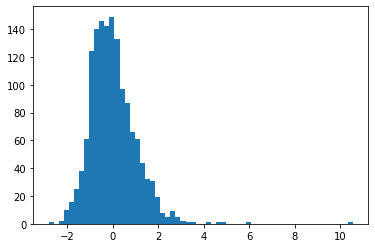

In [26]:
# Plot the histogram of TotalSqFt_constructed
plt.hist(X.TotalSqFt_constructed, bins = 60);

In [27]:
X.TotalSqFt_constructed.describe()

count    1.460000e+03
mean    -2.494200e-17
std      1.000343e+00
min     -2.827206e+00
25%     -6.767298e-01
50%     -1.108972e-01
75%      5.524118e-01
max      1.055469e+01
Name: TotalSqFt_constructed, dtype: float64

We could see if there is a strong outlier in the TotalSqFt_constructed. 

There are many options for treating outliers; in this analysis, we will remove the outlier using Q3 + 1.5*IQR.

In [28]:
IQR = 0.547981 - (-0.676990)
y = y[X.TotalSqFt_constructed <= (0.547981 + 1.5*IQR)]
X = X[X.TotalSqFt_constructed <= (0.547981 + 1.5*IQR)]

**Split into train and test set**

In [29]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75,
                                                    test_size=0.25, random_state=541)

## Ridge

We will use a list of params fed into the GridSearchCV to find the optimum **alpha** parameter.

In [30]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            
model_cv.fit(X_train, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030001,0.001095,0.009600,0.002245,0.0001,{'alpha': 0.0001},-0.085839,-0.091311,-0.087864,-0.088383,...,-0.086252,0.004545,26,-0.061942,-0.060562,-0.059228,-0.060560,-0.062705,-0.060999,0.001210
1,0.042197,0.014206,0.010402,0.002871,0.001,{'alpha': 0.001},-0.085867,-0.091280,-0.087850,-0.088345,...,-0.086237,0.004541,25,-0.061955,-0.060567,-0.059232,-0.060565,-0.062710,-0.061006,0.001211
2,0.029403,0.002655,0.008801,0.001718,0.01,{'alpha': 0.01},-0.086134,-0.090983,-0.087712,-0.087985,...,-0.086098,0.004493,24,-0.062043,-0.060614,-0.059279,-0.060620,-0.062763,-0.061064,0.001219
3,0.031002,0.002967,0.008803,0.000749,0.05,{'alpha': 0.05},-0.086108,-0.089967,-0.087260,-0.086788,...,-0.085476,0.004313,23,-0.062269,-0.060798,-0.059424,-0.060858,-0.063046,-0.061279,0.001261
4,0.026398,0.001020,0.008401,0.000489,0.1,{'alpha': 0.1},-0.085910,-0.089155,-0.086937,-0.085677,...,-0.084974,0.004081,22,-0.062509,-0.061006,-0.059574,-0.061155,-0.063294,-0.061507,0.001289


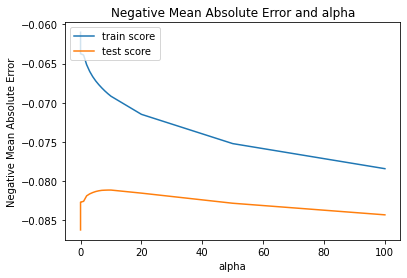

In [32]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [33]:
print(model_cv.best_params_)

{'alpha': 10.0}


Now we will be fine-tuning by iterating in a small range to find the optimum **alpha** parameter.

In [34]:
params = {'alpha': np.linspace(9, 20, 200)}
ridge = Ridge()
# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, 
                        n_jobs=-1)            
model_cv.fit(X_train, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 9.        ,  9.05527638,  9.11055276,  9.16582915,  9.22110553,
        9.27638191,  9.33165829,  9.38693467,  9.44221106,  9.49748744,
        9.55276382,  9.6080402 ,  9.66331658,  9.71859296,  9.77386935,
        9.82914573,  9.88442211,  9.93969849,  9.99497487, 10.05025126,
       10.10552764, 10.16080...
       18.67336683, 18.72864322, 18.7839196 , 18.83919598, 18.89447236,
       18.94974874, 19.00502513, 19.06030151, 19.11557789, 19.17085427,
       19.22613065, 19.28140704, 19.33668342, 19.3919598 , 19.44723618,
       19.50251256, 19.55778894, 19.61306533, 19.66834171, 19.72361809,
       19.77889447, 19.83417085, 19.88944724, 19.94472362, 20.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [35]:
model_cv.best_params_

{'alpha': 9.331658291457286}

In [36]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=9.331658291457286)

In [37]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
print(round(metrics.r2_score(y_train, y_pred_train),4))
print(round(metrics.r2_score(y_test, y_pred_test),4))

0.937
0.8995


In [38]:
print(round(metrics.mean_squared_error(y_test, y_pred_test),4))

0.0127


**Using all available predictors and Ridge regression with the optimum alpha parameter of 9.33, our model produces an r2 score of 0.937 for the train set and 0.8995 for the test set.**

## Lasso

We will use a list of params fed into the GridSearchCV to find the optimum **alpha** parameter.

In [39]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.02]}

lasso = Lasso()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.02]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.306028,0.042028,0.014799,0.003968,0.0001,{'alpha': 0.0001},-0.081836,-0.085961,-0.084935,-0.080091,...,-0.081639,0.003775,2,-0.065213,-0.063476,-0.062266,-0.064496,-0.065659,-0.064222,0.001225
1,0.166211,0.033322,0.015603,0.008261,0.001,{'alpha': 0.001},-0.081290,-0.083585,-0.089181,-0.080360,...,-0.081581,0.005077,1,-0.075055,-0.075043,-0.071439,-0.074932,-0.075553,-0.074405,0.001498
2,0.037804,0.007757,0.009802,0.001721,0.01,{'alpha': 0.01},-0.090166,-0.096040,-0.101353,-0.095909,...,-0.093750,0.005519,3,-0.093162,-0.090747,-0.089008,-0.091776,-0.093623,-0.091663,0.001673
3,0.027692,0.004462,0.006751,0.001902,0.02,{'alpha': 0.02},-0.096196,-0.103244,-0.106044,-0.098226,...,-0.099313,0.004762,4,-0.099098,-0.098368,-0.095528,-0.096939,-0.099516,-0.097890,0.001471


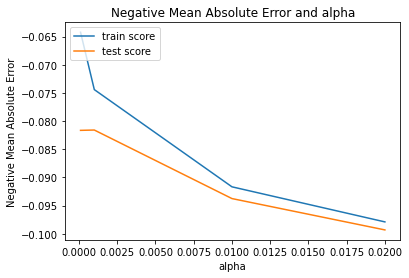

In [41]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [42]:
model_cv.best_params_

{'alpha': 0.001}

Now we will be fine-tuning by iterating in a small range to find the optimum **alpha** parameter.

In [43]:
# list of alphas to tune
params = {'alpha': np.linspace(0.0001, 0.01, 500)}

lasso = Lasso()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, 
                        n_jobs=-1)            

model_cv.fit(X_train, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.0001    , 0.00011984, 0.00013968, 0.00015952, 0.00017936,
       0.0001992 , 0.00021904, 0.00023888, 0.00025872, 0.00027856,
       0.0002984 , 0.00031824, 0.00033808, 0.00035792, 0.00037776,
       0.0003976 , 0.00041743, 0.00043727, 0.00045711, 0.00047695,
       0.00049679, 0.000516...
       0.00942465, 0.00944449, 0.00946433, 0.00948417, 0.00950401,
       0.00952385, 0.00954369, 0.00956353, 0.00958337, 0.00960321,
       0.00962305, 0.00964289, 0.00966273, 0.00968257, 0.0097024 ,
       0.00972224, 0.00974208, 0.00976192, 0.00978176, 0.0098016 ,
       0.00982144, 0.00984128, 0.00986112, 0.00988096, 0.0099008 ,
       0.00992064, 0.00994048, 0.00996032, 0.00998016, 0.01      ])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [44]:
model_cv.best_params_

{'alpha': 0.0004372745490981964}

In [45]:
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0004372745490981964)

In [46]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
print(round(metrics.r2_score(y_train, y_pred_train),4))
print(round(metrics.r2_score(y_test, y_pred_test),4))

0.933
0.8964


In [47]:
print(round(metrics.mean_squared_error(y_test, y_pred_test),4))

0.0131


**Using all available predictors and Lasso regression with the optimum alpha parameter of 0.000437, our model produces an r2 score of 0.933 for the train set and 0.8964 for the test set.**

## ElasticNet

Elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

We will use a list of params fed into the GridSearchCV to find the optimum **alpha** parameter.

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.422344,0.076732,0.015002,0.002830,0.0001,{'alpha': 0.0001},-0.082945,-0.087703,-0.084953,-0.082672,...,-0.082934,0.003732,2,-0.063929,-0.062253,-0.060872,-0.062817,-0.064541,-0.062882,0.001287
1,0.158012,0.056211,0.012602,0.002060,0.001,{'alpha': 0.001},-0.081396,-0.080711,-0.086970,-0.079123,...,-0.080159,0.004616,1,-0.071806,-0.071265,-0.068052,-0.071693,-0.072420,-0.071047,0.001542
2,0.056805,0.012191,0.014200,0.004217,0.01,{'alpha': 0.01},-0.084860,-0.093345,-0.095783,-0.091931,...,-0.089159,0.005894,3,-0.087644,-0.086032,-0.083595,-0.087081,-0.088421,-0.086555,0.001672
3,0.041601,0.013351,0.017600,0.002939,0.05,{'alpha': 0.05},-0.099689,-0.107398,-0.108856,-0.101108,...,-0.102692,0.004714,4,-0.102279,-0.101630,-0.098904,-0.100238,-0.102865,-0.101184,0.001437
4,0.043604,0.010249,0.015603,0.002243,0.1,{'alpha': 0.1},-0.118790,-0.126219,-0.124516,-0.120626,...,-0.121200,0.003767,5,-0.120128,-0.119352,-0.119044,-0.119418,-0.122784,-0.120145,0.001366


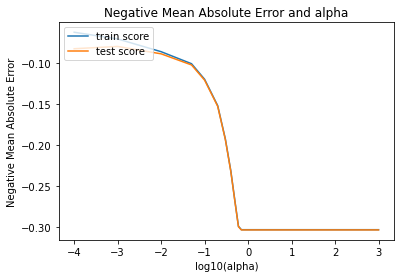

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [51]:
model_cv.best_params_

{'alpha': 0.001}

Now we will be fine-tuning by iterating in a small range to find the optimum **alpha** parameter.

In [52]:
# list of alphas to tune
params = {'alpha': np.linspace(0, 0.002, 500)}
elasticnet = ElasticNet()
# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.00000000e+00, 4.00801603e-06, 8.01603206e-06, 1.20240481e-05,
       1.60320641e-05, 2.00400802e-05, 2.40480962e-05, 2.80561122e-05,
       3.20641283e-05, 3.60721443e-05, 4.00801603e-05, 4.40881764e-05,
       4.80961924e-05, 5.21042084e-05, 5.61122244e-05, 6....
       1.92384770e-03, 1.92785571e-03, 1.93186373e-03, 1.93587174e-03,
       1.93987976e-03, 1.94388778e-03, 1.94789579e-03, 1.95190381e-03,
       1.95591182e-03, 1.95991984e-03, 1.96392786e-03, 1.96793587e-03,
       1.97194389e-03, 1.97595190e-03, 1.97995992e-03, 1.98396794e-03,
       1.98797595e-03, 1.99198397e-03, 1.99599198e-03, 2.00000000e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [53]:
model_cv.best_params_

{'alpha': 0.0010861723446893787}

In [54]:
alpha = model_cv.best_params_['alpha']

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=0.0010861723446893787)

In [55]:
y_pred_train = elasticnet.predict(X_train)
y_pred_test = elasticnet.predict(X_test)
print(round(metrics.r2_score(y_train, y_pred_train),4))
print(round(metrics.r2_score(y_test, y_pred_test),4))

0.9308
0.8959


In [56]:
print(round(metrics.mean_squared_error(y_test, y_pred_test),4))

0.0131


**Using all available predictors and ElasticNet regression with the optimum alpha parameter of 0.001086, our model produces an r2 score of 0.9308 for the train set and 0.8959 for the test set.**

### Summary

Using all predictors available, all three regularizations produce virtually the same results.

In the next section, we will try to use feature selection to trim the number of variables used.

## Forward Feature Selection


In [57]:
X_train.shape

(1076, 239)

We will use AIC and BIC to measure the information gain/loss by adding/removing variables.

In [58]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

**Using forward feature selection, we will pick ten variables according to their AIC/BIC**

In [59]:
features = X_train.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['TotalSqFt_constructed'] 
AIC:  -3364.396711669093 
BIC:  -3354.4347001876495
Selected features:  ['TotalSqFt_constructed', 'OverallQual'] 
AIC:  -3841.780046528153 
BIC:  -3826.837029305988
Selected features:  ['TotalSqFt_constructed', 'OverallQual', 'BsmtUnfSF'] 
AIC:  -3990.5423814654273 
BIC:  -3970.6183585025406
Selected features:  ['TotalSqFt_constructed', 'OverallQual', 'BsmtUnfSF', 'house_age'] 
AIC:  -4076.018161242638 
BIC:  -4051.1131325390297
Selected features:  ['TotalSqFt_constructed', 'OverallQual', 'BsmtUnfSF', 'house_age', 'OverallCond'] 
AIC:  -4266.389597153047 
BIC:  -4236.503562708717
Selected features:  ['TotalSqFt_constructed', 'OverallQual', 'BsmtUnfSF', 'house_age', 'OverallCond', 'Neighborhood_Crawfor'] 
AIC:  -4369.177856360046 
BIC:  -4334.310816174993
Selected features:  ['TotalSqFt_constructed', 'OverallQual', 'BsmtUnfSF', 'house_age', 'OverallCond', 'Neighborhood_Crawfor', 'Foundation_PConc'] 
AIC:  -4401.69773768701 
BIC:  -4361.8496

Assign the selected features into a new object.

In [60]:
X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]

### Selected Variables + Ridge

We will use a list of params fed into the GridSearchCV to find the optimum **alpha** parameter.

In [61]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 10]}
ridge = Ridge()
# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            
model_cv.fit(X_train_select, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error')

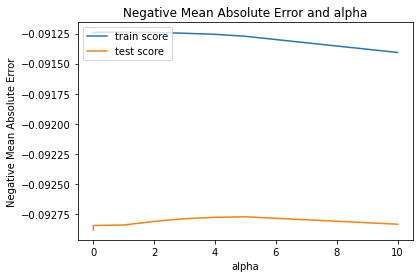

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
model_cv.best_params_

{'alpha': 5.0}

Now we will be fine-tuning by iterating in a small range to find the optimum **alpha** parameter.

In [64]:
# list of alphas to tune
params = {'alpha': np.linspace(4, 10, 200)}

ridge = Ridge()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train_select, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 4.        ,  4.03015075,  4.06030151,  4.09045226,  4.12060302,
        4.15075377,  4.18090452,  4.21105528,  4.24120603,  4.27135678,
        4.30150754,  4.33165829,  4.36180905,  4.3919598 ,  4.42211055,
        4.45226131,  4.48241206,  4.51256281,  4.54271357,  4.57286432,
        4.60301508,  4.63316583...
        9.12562814,  9.15577889,  9.18592965,  9.2160804 ,  9.24623116,
        9.27638191,  9.30653266,  9.33668342,  9.36683417,  9.39698492,
        9.42713568,  9.45728643,  9.48743719,  9.51758794,  9.54773869,
        9.57788945,  9.6080402 ,  9.63819095,  9.66834171,  9.69849246,
        9.72864322,  9.75879397,  9.78894472,  9.81909548,  9.84924623,
        9.87939698,  9.90954774,  9.93969849,  9.96984925, 10.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [65]:
model_cv.best_params_

{'alpha': 4.9045226130653266}

In [66]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_select, y_train)

Ridge(alpha=4.9045226130653266)

In [67]:
y_pred_train = ridge.predict(X_train_select)
y_pred_test = ridge.predict(X_test_select)
print(round(metrics.r2_score(y_train, y_pred_train),4))
print(round(metrics.r2_score(y_test, y_pred_test),4))

0.8926
0.8801


In [68]:
print(round(metrics.mean_squared_error(y_test, y_pred_test),4))

0.0151


**Using ten predictors and Ridge regression with the optimum alpha parameter of 4.9045, our model produces an r2 score of 0.8926 for the train set and 0.8801 for the test set.**

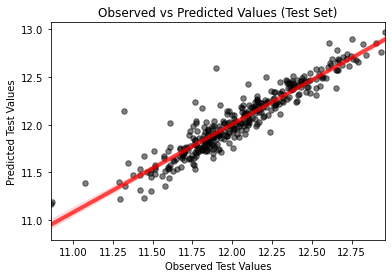

In [69]:
sns.regplot(y_test, y_pred_test, line_kws={"color":"r","alpha":0.7,"lw":4}, scatter_kws={"color":"black","alpha":0.5,"s":30})
plt.xlabel('Observed Test Values')
plt.ylabel('Predicted Test Values')

plt.title("Observed vs Predicted Values (Test Set)")
plt.show()

In [70]:
model_parameters = list(elasticnet.coef_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_select.columns
coef = pd.DataFrame(list(zip(cols,model_parameters)))
coef.columns = ['Feature','Coef']
coef['abs_coef'] = abs(coef.Coef)
coef = coef.sort_values(by='abs_coef',ascending=False)
coef

,Feature,Coef,abs_coef
3,house_age,0.080,0.080
9,SaleCondition_Partial,0.064,0.064
4,OverallCond,0.056,0.056
6,Foundation_PConc,0.022,0.022
2,BsmtUnfSF,0.015,0.015
0,TotalSqFt_constructed,-0.007,0.007
7,Fireplaces,0.006,0.006
8,BldgType_Twnhs,-0.004,0.004
1,OverallQual,0.002,0.002
5,Neighborhood_Crawfor,0.001,0.001


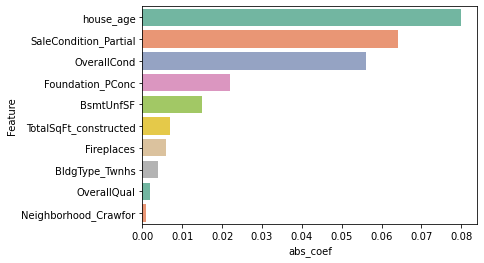

In [71]:
sns.barplot(y = 'Feature', x='abs_coef', palette='Set2', data = coef)
plt.show()

### Selected Variables + Lasso

We will use a list of params fed into the GridSearchCV to find the optimum **alpha** parameter.

In [72]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.02]}

lasso = Lasso()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train_select, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.02]},
             return_train_score=True, scoring='neg_mean_absolute_error')

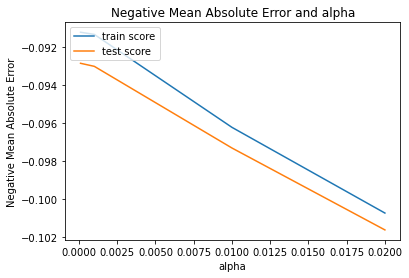

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
model_cv.best_params_

{'alpha': 0.0001}

Now we will be fine-tuning by iterating in a small range to find the optimum **alpha** parameter.

In [75]:
# list of alphas to tune
params = {'alpha': np.linspace(0, 0.001, 200)}

lasso = Lasso()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train_select, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.00000000e+00, 5.02512563e-06, 1.00502513e-05, 1.50753769e-05,
       2.01005025e-05, 2.51256281e-05, 3.01507538e-05, 3.51758794e-05,
       4.02010050e-05, 4.52261307e-05, 5.02512563e-05, 5.52763819e-05,
       6.03015075e-05, 6.53266332e-05, 7.03517588e-05, 7.53768...
       9.04522613e-04, 9.09547739e-04, 9.14572864e-04, 9.19597990e-04,
       9.24623116e-04, 9.29648241e-04, 9.34673367e-04, 9.39698492e-04,
       9.44723618e-04, 9.49748744e-04, 9.54773869e-04, 9.59798995e-04,
       9.64824121e-04, 9.69849246e-04, 9.74874372e-04, 9.79899497e-04,
       9.84924623e-04, 9.89949749e-04, 9.94974874e-04, 1.00000000e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [76]:
model_cv.best_params_

{'alpha': 0.00031155778894472364}

In [77]:
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_select, y_train)

Lasso(alpha=0.00031155778894472364)

In [78]:
y_pred_train = lasso.predict(X_train_select)
y_pred_test = lasso.predict(X_test_select)
print(round(metrics.r2_score(y_train, y_pred_train),4))
print(round(metrics.r2_score(y_test, y_pred_test),4))

0.8926
0.8801


In [79]:
print(round(metrics.mean_squared_error(y_test, y_pred_test),4))

0.0151


**Using ten predictors and Lasso regression with the optimum alpha parameter of 0.000312, our model produces an r2 score of 0.8926 for the train set and 0.8801 for the test set.**

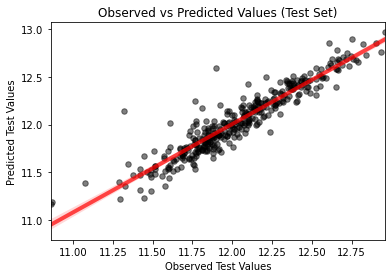

In [80]:
sns.regplot(y_test, y_pred_test, line_kws={"color":"r","alpha":0.7,"lw":4}, scatter_kws={"color":"black","alpha":0.5,"s":30})
plt.xlabel('Observed Test Values')
plt.ylabel('Predicted Test Values')

plt.title("Observed vs Predicted Values (Test Set)")
plt.show()

In [81]:
model_parameters = list(elasticnet.coef_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_select.columns
coef = pd.DataFrame(list(zip(cols,model_parameters)))
coef.columns = ['Feature','Coef']
coef['abs_coef'] = abs(coef.Coef)
coef = coef.sort_values(by='abs_coef',ascending=False)
coef

,Feature,Coef,abs_coef
3,house_age,0.080,0.080
9,SaleCondition_Partial,0.064,0.064
4,OverallCond,0.056,0.056
6,Foundation_PConc,0.022,0.022
2,BsmtUnfSF,0.015,0.015
0,TotalSqFt_constructed,-0.007,0.007
7,Fireplaces,0.006,0.006
8,BldgType_Twnhs,-0.004,0.004
1,OverallQual,0.002,0.002
5,Neighborhood_Crawfor,0.001,0.001


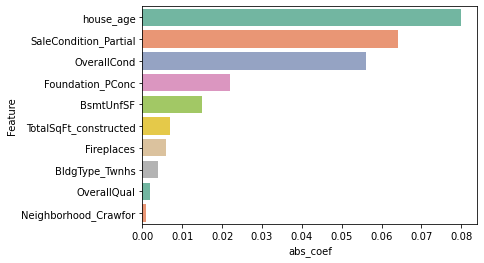

In [82]:
sns.barplot(y = 'Feature', x='abs_coef', palette='Set2', data = coef)
plt.show()

### Selected Variables + ElasticNet

Elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

We will use a list of params fed into the GridSearchCV to find the optimum **alpha** parameter.

In [83]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train_select, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

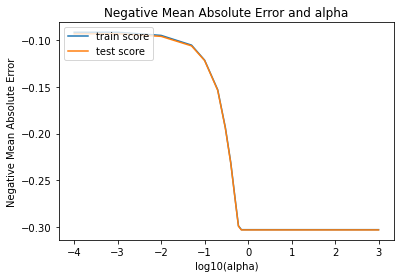

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
model_cv.best_params_

{'alpha': 0.001}

Now we will be fine-tuning by iterating in a small range to find the optimum **alpha** parameter.

In [86]:
# list of alphas to tune
params = {'alpha': np.linspace(0, 0.002, 500)}
elasticnet = ElasticNet()
# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs = -1)            

model_cv.fit(X_train_select, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.00000000e+00, 4.00801603e-06, 8.01603206e-06, 1.20240481e-05,
       1.60320641e-05, 2.00400802e-05, 2.40480962e-05, 2.80561122e-05,
       3.20641283e-05, 3.60721443e-05, 4.00801603e-05, 4.40881764e-05,
       4.80961924e-05, 5.21042084e-05, 5.61122244e-05, 6....
       1.92384770e-03, 1.92785571e-03, 1.93186373e-03, 1.93587174e-03,
       1.93987976e-03, 1.94388778e-03, 1.94789579e-03, 1.95190381e-03,
       1.95591182e-03, 1.95991984e-03, 1.96392786e-03, 1.96793587e-03,
       1.97194389e-03, 1.97595190e-03, 1.97995992e-03, 1.98396794e-03,
       1.98797595e-03, 1.99198397e-03, 1.99599198e-03, 2.00000000e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [87]:
model_cv.best_params_

{'alpha': 0.0006092184368737475}

In [88]:
alpha = model_cv.best_params_['alpha']

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train_select, y_train) 

ElasticNet(alpha=0.0006092184368737475)

In [89]:
y_pred_train = elasticnet.predict(X_train_select)
y_pred_test = elasticnet.predict(X_test_select)
print(round(metrics.r2_score(y_train, y_pred_train),4))
print(round(metrics.r2_score(y_test, y_pred_test),4))

0.8926
0.8801


In [90]:
print(round(metrics.mean_squared_error(y_test, y_pred_test),4))

0.0151


**Using ten predictors and ElasticNet regression with the optimum alpha parameter of 0.000609, our model produces an r2 score of 0.8926 for the train set and 0.8801 for the test set.**

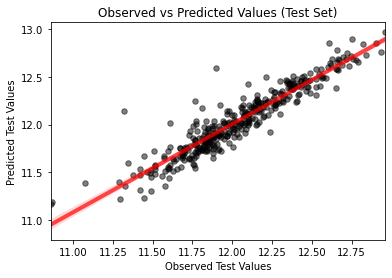

In [91]:
sns.regplot(y_test, y_pred_test, line_kws={"color":"r","alpha":0.7,"lw":4}, scatter_kws={"color":"black","alpha":0.5,"s":30})
plt.xlabel('Observed Test Values')
plt.ylabel('Predicted Test Values')

plt.title("Observed vs Predicted Values (Test Set)")
plt.show()

In [92]:
model_parameters = list(elasticnet.coef_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
coef = pd.DataFrame(list(zip(cols,model_parameters)))
coef.columns = ['Feature','Coef']
coef['abs_coef'] = abs(coef.Coef)
coef = coef.sort_values(by='abs_coef',ascending=False)
coef

,Feature,Coef,abs_coef
0,MSSubClass,0.245,0.245
8,BsmtUnfSF,-0.110,0.110
5,MasVnrArea,0.104,0.104
1,LotFrontage,0.098,0.098
3,OverallQual,-0.096,0.096
4,OverallCond,0.068,0.068
9,1stFlrSF,0.061,0.061
6,BsmtFinSF1,0.057,0.057
2,LotArea,-0.043,0.043
7,BsmtFinSF2,0.033,0.033


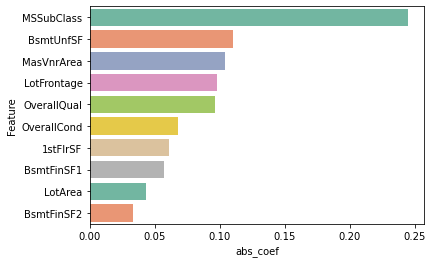

In [93]:
sns.barplot(y = 'Feature', x='abs_coef', palette='Set2', data = coef)
plt.show()

### Summary

After creating models in Ridge, Lasso and ElasticNet, we can see that r2_score of train and test set is almost the same, only tiny differences exist!

# Conclusion

**With all available predictors**

The optimal lambda value is:
   
    Ridge: 9.332
    Lasso: 0.000437
    ElasticNet: 0.001086

The r2_score of predicted train set and test set and the mean squared error of predicted of test value is:
    
    Ridge: 0.937, 0.8995, 0.0127
    Lasso: 0.933, 0.8964, 0.0131
    ElasticNet: 0.9308, 0.8959, 0.0131

**With ten predictors only (selected by forward selection)**

The optimal lambda value is:
   
    Ridge: 4.904
    Lasso: 0.000312
    ElasticNet: 0.000609

The r2_score of predicted train set and test set and the mean squared error of predicted of test value is:
    
    Ridge: 0.8926, 0.8801, 0.0151
    Lasso: 0.8926, 0.8801, 0.0151
    ElasticNet: 0.8926, 0.8801, 0.0151

**There are interesting observation here**, if we see the r2 score of the train set in the full variable model and the model with ten variable only, the r2 score gap is quite noticeable (~0.93 vs. ~0.89), but the r2 score of the test set only differ around 0.01! It indicates that by using ten variables only, we can generalize our model better with relatively high accuracy. 

**Hence, we will choose the model with ten predictors only!** (Occam's razor principle)

In a model of 10 predictors, we create three options for the regularization. It is a hard choice as they don’t have any noticeable differences. So whatever the chosen model, all produce all the same results.

Let say we choose ElasticNet because it is combining the advantages of both Lasso and Ridge, the five most important predictors that generally affect the prices are :

    MSSubClass	0.245
    BsmtUnfSF	-0.110
    MasVnrArea	0.104
    LotFrontage	0.098
    OverallQual	-0.096
    
We can see that the sales price is quite affected by **the type of dwelling involved in the sale (coef: 0.245)** followed by **Unfinished square feet of basement area (coef: -0.110)**, then followed by **Masonry veneer area in square feet (coef: 0.104)**, **Linear feet of street-connected to property (coef: 0.098)**, **Rates the overall material and finish of the house (coef: -0.096)**